<a href="https://colab.research.google.com/github/kalathomas083/thinkful-capstone/blob/master/Airbnb_Cancellation_Policy_A_B_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

Vacation rentals have become a booming business in the internet age. It's also a strong source of income for those who own a second home or want to rent out the extra space in their primary homes to short-term renters.

Because the vacation rental industry is relatively new, there are still many questions left unanswered about how to make the most money.

# 2. Hypothesis

Ho: There is no significant difference between the average nightly rates of properties with stricter cancellation policies than those with more relaxed cancellation policies.

Ha: There is a significant difference between the average nightly rates of properties with stricter cancellation policies than those with more relaxed cancellation policies.

# 3. Data
The data set comes from Kaggle and contains 3818 listing records with 91 different data points. All of the listings are located in Seattle, WA

https://www.kaggle.com/airbnb/seattle?select=listings.csv

## Set up the data

In [ ]:
## set up environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [ ]:
# load data
listing_df = pd.read_csv('/content/drive/My Drive/Thinkful/Homework Assignments/Capstone 1 Experimental Design/Raw Data/listings.csv')

# inspect data
listing_df.info()
listing_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,

###Clean the data

Issues with the data:
+ There's a lot of extra columns I won't be using for this analysis
+ The price column is not a number and has a special character making analysis impossible

In [ ]:
#select only the needed columns and remove 1 null value
cancel = listing_df[['price', 'cancellation_policy','beds']].dropna()

#remove the '$' from the price column and convert to float
cancel['price'] = cancel['price'].str.replace('$','').str.replace(',','').astype('float64')

#rexamine data
cancel.info()
cancel.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3817 entries, 0 to 3817
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                3817 non-null   float64
 1   cancellation_policy  3817 non-null   object 
 2   beds                 3817 non-null   float64
dtypes: float64(2), object(1)
memory usage: 119.3+ KB


,price,cancellation_policy,beds
0,85.0,moderate,1.0
1,150.0,strict,1.0
2,975.0,strict,7.0
3,100.0,flexible,2.0
4,450.0,strict,3.0


### Examine data in pivot to see any obvious trends
I chose to look at a pivot table of the average nightly rate broken up by bedrooms and cancellation policy of all listings.

In [ ]:
cancel_pivot = cancel.pivot_table(index='beds', columns='cancellation_policy', values='price')
cancel_pivot

cancellation_policy,flexible,moderate,strict
beds,,,
1.0,88.034653,92.349227,100.854133
2.0,132.947598,123.405941,149.781579
3.0,193.883117,183.954128,200.587045
4.0,230.520000,205.055556,245.131868
5.0,404.285714,298.055556,299.187500
6.0,350.000000,210.600000,344.466667
7.0,195.000000,195.000000,446.545455
8.0,41.000000,38.000000,387.500000
9.0,NaN,NaN,504.250000


##Create dataframes
Create data frames for:
+ 1 bedroom listings
+ 2 bedroom listings
+ 3 bedroom listings

Each of the 3 dataframes will be broken down into 3 additional dataframes, one for each cancellation policy for a total of 12 data frames.




###One bedroom dataframes


In [ ]:
# all one bedroom listings
one_bedroom = cancel.loc[cancel.beds == 1.0]
one_bedroom.head()
one_bedroom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2201 entries, 0 to 3817
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                2201 non-null   float64
 1   cancellation_policy  2201 non-null   object 
 2   beds                 2201 non-null   float64
dtypes: float64(2), object(1)
memory usage: 68.8+ KB


In [ ]:
# one bedroom strict cancellation policy
obr_strict = one_bedroom.loc[one_bedroom.cancellation_policy == 'strict']
obr_strict.info()
obr_strict.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 1 to 3809
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                617 non-null    float64
 1   cancellation_policy  617 non-null    object 
 2   beds                 617 non-null    float64
dtypes: float64(2), object(1)
memory usage: 19.3+ KB


,price,cancellation_policy,beds
1,150.0,strict,1.0
5,120.0,strict,1.0
7,60.0,strict,1.0
8,90.0,strict,1.0
9,150.0,strict,1.0


In [ ]:
# one bedroom moderate cancellation policy
obr_moderate = one_bedroom.loc[one_bedroom.cancellation_policy == 'moderate']
obr_moderate.info()
obr_moderate.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 0 to 3816
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                776 non-null    float64
 1   cancellation_policy  776 non-null    object 
 2   beds                 776 non-null    float64
dtypes: float64(2), object(1)
memory usage: 24.2+ KB


,price,cancellation_policy,beds
0,85.0,moderate,1.0
6,80.0,moderate,1.0
10,95.0,moderate,1.0
16,66.0,moderate,1.0
17,99.0,moderate,1.0


In [ ]:
# one bedroom flexible cancellation policy
obr_flexible = one_bedroom.loc[one_bedroom.cancellation_policy == 'flexible']
obr_flexible.info()
obr_flexible.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808 entries, 18 to 3817
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                808 non-null    float64
 1   cancellation_policy  808 non-null    object 
 2   beds                 808 non-null    float64
dtypes: float64(2), object(1)
memory usage: 25.2+ KB


,price,cancellation_policy,beds
18,200.0,flexible,1.0
20,110.0,flexible,1.0
23,75.0,flexible,1.0
37,45.0,flexible,1.0
39,80.0,flexible,1.0


###Two bedroom dataframes


In [ ]:
# two bedroom listings cancellation policy
two_bedroom = cancel.loc[cancel.beds == 2.0]
two_bedroom.head()
two_bedroom.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 912 entries, 3 to 3814
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                912 non-null    float64
 1   cancellation_policy  912 non-null    object 
 2   beds                 912 non-null    float64
dtypes: float64(2), object(1)
memory usage: 28.5+ KB


In [ ]:
# two bedroom strict cancellation policy
twbr_strict = two_bedroom.loc[two_bedroom.cancellation_policy == 'strict']
twbr_strict.info()
twbr_strict.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 15 to 3805
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                380 non-null    float64
 1   cancellation_policy  380 non-null    object 
 2   beds                 380 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.9+ KB


,price,cancellation_policy,beds
15,109.0,strict,2.0
29,80.0,strict,2.0
34,159.0,strict,2.0
41,148.0,strict,2.0
63,60.0,strict,2.0


In [ ]:
# two bedroom moderate cancellation policy
twbr_moderate = two_bedroom.loc[two_bedroom.cancellation_policy == 'moderate']
twbr_moderate.info()
twbr_moderate.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 21 to 3814
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                303 non-null    float64
 1   cancellation_policy  303 non-null    object 
 2   beds                 303 non-null    float64
dtypes: float64(2), object(1)
memory usage: 9.5+ KB


,price,cancellation_policy,beds
21,99.0,moderate,2.0
35,125.0,moderate,2.0
38,150.0,moderate,2.0
40,110.0,moderate,2.0
42,350.0,moderate,2.0


In [ ]:
# two bedroom flexible cancellation policy
twbr_flexible = two_bedroom.loc[two_bedroom.cancellation_policy == 'flexible']
twbr_flexible.info()
twbr_flexible.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 3 to 3806
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                229 non-null    float64
 1   cancellation_policy  229 non-null    object 
 2   beds                 229 non-null    float64
dtypes: float64(2), object(1)
memory usage: 7.2+ KB


,price,cancellation_policy,beds
3,100.0,flexible,2.0
32,175.0,flexible,2.0
95,225.0,flexible,2.0
111,150.0,flexible,2.0
145,110.0,flexible,2.0


###Three bedroom dataframes

In [ ]:
# three bedroom listings cancellation policy
three_bedroom = cancel.loc[cancel.beds == 3.0]
three_bedroom.head()
three_bedroom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433 entries, 4 to 3813
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                433 non-null    float64
 1   cancellation_policy  433 non-null    object 
 2   beds                 433 non-null    float64
dtypes: float64(2), object(1)
memory usage: 13.5+ KB


In [ ]:
# three bedroom strict cancellation policy
thbr_strict = three_bedroom.loc[three_bedroom.cancellation_policy == 'strict']
thbr_strict.info()
thbr_strict.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 4 to 3813
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                247 non-null    float64
 1   cancellation_policy  247 non-null    object 
 2   beds                 247 non-null    float64
dtypes: float64(2), object(1)
memory usage: 7.7+ KB


,price,cancellation_policy,beds
4,450.0,strict,3.0
13,165.0,strict,3.0
31,325.0,strict,3.0
33,222.0,strict,3.0
36,348.0,strict,3.0


In [ ]:
# three bedroom moderate cancellation policy
thbr_moderate = three_bedroom.loc[three_bedroom.cancellation_policy == 'moderate']
thbr_moderate.info()
thbr_moderate.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 12 to 3716
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                109 non-null    float64
 1   cancellation_policy  109 non-null    object 
 2   beds                 109 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.4+ KB


,price,cancellation_policy,beds
12,245.0,moderate,3.0
24,600.0,moderate,3.0
28,300.0,moderate,3.0
49,130.0,moderate,3.0
58,400.0,moderate,3.0


In [ ]:
# three bedroom flexible cancellation policy
thbr_flexible = three_bedroom.loc[three_bedroom.cancellation_policy == 'flexible']
thbr_flexible.info()
thbr_flexible.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 26 to 3760
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                77 non-null     float64
 1   cancellation_policy  77 non-null     object 
 2   beds                 77 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.4+ KB


,price,cancellation_policy,beds
26,150.0,flexible,3.0
90,105.0,flexible,3.0
154,200.0,flexible,3.0
168,110.0,flexible,3.0
193,116.0,flexible,3.0


### Dataframes summary 

Looking at the sample size, they are far from even. The three bedroom dataframes have the smallest sample size where the one bedrooms offer a far greater sample size. All of the samples are large enough to do analysis on.

## Determine distribution

### One bedroom

Text(0.5, 1.0, 'one bedroom homes')

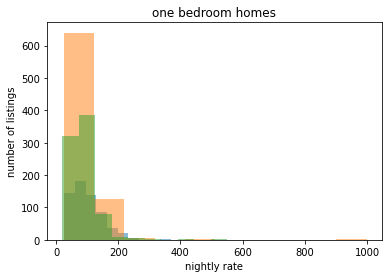

In [ ]:
plt.hist(obr_strict.price, alpha = .5)
plt.hist(obr_moderate.price, alpha = .5)
plt.hist(obr_flexible.price, alpha = .5)
plt.xlabel('nightly rate')
plt.ylabel('number of listings')
plt.title('one bedroom homes')

In [ ]:
print('strict: ',stats.describe(obr_strict.price))
print('moderate: ',stats.describe(obr_moderate.price))
print('flexible: ',stats.describe(obr_flexible.price))

The strict data has a kurtosis of ~2.3 and a skewness of ~1.0 making it within allowable limits, however because it's close enough to 3 and the others are not, I'm going to treat them all as non-normal.

### Two bedroom

Text(0.5, 1.0, 'two bedroom homes')

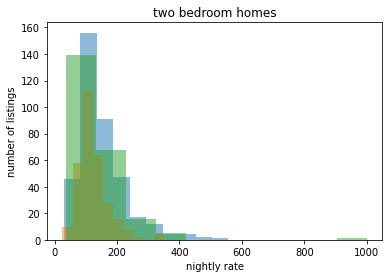

In [ ]:
plt.hist(twbr_strict.price, alpha = .5)
plt.hist(twbr_moderate.price, alpha = .5)
plt.hist(twbr_flexible.price, alpha = .5)
plt.xlabel('nightly rate')
plt.ylabel('number of listings')
plt.title('two bedroom homes')

In [ ]:
print('strict: ',stats.describe(twbr_strict.price))
print('moderate: ',stats.describe(twbr_moderate.price))
print('flexible: ',stats.describe(twbr_flexible.price))


strict:  DescribeResult(nobs=380, minmax=(29.0, 557.0), mean=149.78157894736842, variance=5799.733169004305, skewness=1.8525638272838925, kurtosis=5.04209231348978)
moderate:  DescribeResult(nobs=303, minmax=(25.0, 350.0), mean=123.4059405940594, variance=2552.7651301553997, skewness=1.5030117922471184, kurtosis=3.4891731837200766)
flexible:  DescribeResult(nobs=229, minmax=(35.0, 1000.0), mean=132.94759825327512, variance=7632.5586455221, skewness=4.756864810290107, kurtosis=41.13818511168561)


The kurtosis of all three 2 bedroom samples are outside the range of normal.

### Three bedroom

Text(0.5, 1.0, 'three bedroom homes')

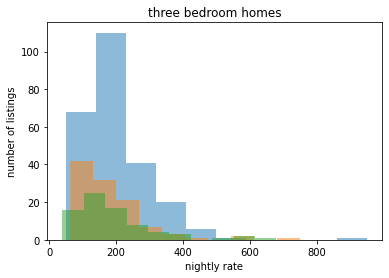

In [ ]:
plt.hist(thbr_strict.price, alpha = .5)
plt.hist(thbr_moderate.price, alpha = .5)
plt.hist(thbr_flexible.price, alpha = .5)
plt.xlabel('nightly rate')
plt.ylabel('number of listings')
plt.title('three bedroom homes')

In [ ]:
print('strict: ',stats.describe(thbr_strict.price))
print('moderate: ',stats.describe(thbr_moderate.price))
print('flexible: ',stats.describe(thbr_flexible.price))

strict:  DescribeResult(nobs=247, minmax=(49.0, 950.0), mean=200.58704453441297, variance=9957.87755505085, skewness=2.4089088878784963, kurtosis=12.22291853981472)
moderate:  DescribeResult(nobs=109, minmax=(62.0, 749.0), mean=183.954128440367, variance=11926.396024464831, skewness=2.5113783364035815, kurtosis=8.426868485000623)
flexible:  DescribeResult(nobs=77, minmax=(39.0, 680.0), mean=193.88311688311688, variance=16257.68352699932, skewness=1.910455318360516, kurtosis=3.8827892489308873)


The kurtosis of all three 3 bedroom samples are outside the range of normal.

## Test for differences

Because all data sets were non-normal in distribution a Kruskal-Wallis test is appropriate for each set. I chose this test because the data sets are not dependent.

###Kruskal-Wallis Test
The Kruskal-Wallis test is used for two or more non-normal groups.

The null hypothesis of the Kruskal–Wallis test is that the **mean ranks of the groups are the same.**

### One bedroom

In [ ]:
stats.kruskal(obr_strict.price, obr_moderate.price, obr_flexible.price)

KruskalResult(statistic=28.298522980840627, pvalue=7.162321501960055e-07)

Because the pvalue is less than .05, the null hypothesis is rejected. This means that the means are different, however it doesn't appear to be a large difference looking at the H value.

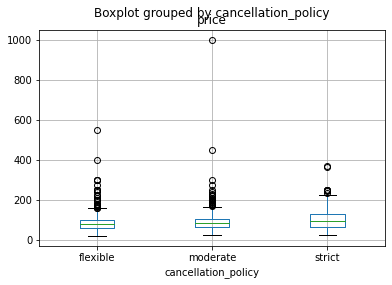

In [ ]:
one_bedroom.boxplot('price',  by='cancellation_policy')

### Two bedroom

In [ ]:
stats.kruskal(twbr_strict.price, twbr_moderate.price, twbr_flexible.price)

KruskalResult(statistic=26.23849979091334, pvalue=2.0062366677334497e-06)

Because the pvalue is less than .05, the null hypothesis is rejected. This means that the means are different, however it doesn't appear to be a large difference looking at the H value.

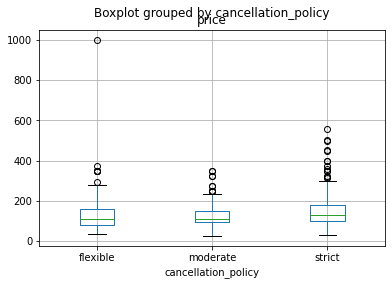

In [ ]:
two_bedroom.boxplot('price',  by='cancellation_policy')

### Three bedroom

In [ ]:
stats.kruskal(thbr_strict.price, thbr_moderate.price, thbr_flexible.price)

KruskalResult(statistic=6.94840260098437, pvalue=0.030986572902842756)

The p value is larger than .05 so the null hypothesis is not rejected for 3 bedroom listings. This means there is no significant difference between the means

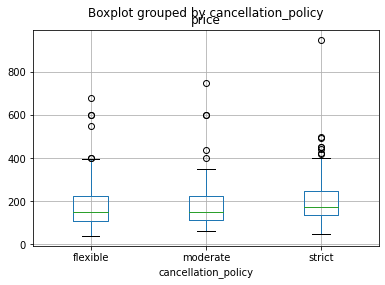

In [ ]:
three_bedroom.boxplot('price',  by='cancellation_policy')

### Looking at all the listings
To see if the pattern holds with the other listings, I opted to run all the remaining listings using a loop to see all the results side by side.

In [ ]:
for beds in cancel.beds.sort_values().unique():
    room_data = cancel[cancel.beds == beds]
    print(beds, stats.kruskal(room_data[room_data.cancellation_policy == 'strict'].price,
                        room_data[room_data.cancellation_policy == 'moderate'].price,
                        room_data[room_data.cancellation_policy == 'flexible'].price,
                        )
    )

1.0 KruskalResult(statistic=28.298522980840627, pvalue=7.162321501960055e-07)
2.0 KruskalResult(statistic=26.23849979091334, pvalue=2.0062366677334497e-06)
3.0 KruskalResult(statistic=6.94840260098437, pvalue=0.030986572902842756)
4.0 KruskalResult(statistic=2.5303591927483957, pvalue=0.282188611537802)
5.0 KruskalResult(statistic=2.5673251927595486, pvalue=0.2770208246497131)
6.0 KruskalResult(statistic=2.80875027073859, pvalue=0.24552042556051898)
7.0 KruskalResult(statistic=5.221246169560777, pvalue=0.07348873977937)
8.0 KruskalResult(statistic=2.6999999999999993, pvalue=0.2592402606458915)
9.0 KruskalResult(statistic=nan, pvalue=nan)
10.0 KruskalResult(statistic=nan, pvalue=nan)
15.0 KruskalResult(statistic=nan, pvalue=nan)


# 5. Results

Looking at the histograms and the skewness and kurtosis variables, none of the data sets were normally distributed. Thus I opted to use a Kruskal-Wallis test since the data met the assumptions:
1. Your dependent variable should be measured at the ordinal or continuous level
2. Your independent variable should consist of two or more categorical, independent groups.
3. You should have independence of observations

The null hypothesis was rejected for 1 and 2 bedroom listings indicating a difference in means between the three cancellation policies.

The null hypothesis was not rejected for any of the other numbers of bedrooms.


# 6. Discussion and recommendation

Prices of different homes with different cancellation policies don't appear to be significantly different for most larger homes. One and two bedroom homes do seem to have a slight difference, however it does not appear to be a large difference.

The next steps would be to determine if other factors could be affecting the change in prices. The box plot suggests there are quite a few outliers suggesting that there is likely another cause for the price difference. If these factors could be accounted for, there could still be a difference between policies. 